In [1]:
from utility import *

In [2]:
traindf = pd.read_csv('data/train/round1_ijcai_18_train_20180301.txt',sep=' ')

In [3]:
testdf = pd.read_csv('data/test/round1_ijcai_18_test_a_20180301.txt',sep=' ')

In [65]:
traindf['predict_category_property'][:3]

0    5799347067982556520:-1;509660095530134768:-1;5...
1    5799347067982556520:9172976955054793469;790838...
2    5799347067982556520:5131280576272319091;725801...
Name: predict_category_property, dtype: object

In [21]:
A = {}
B = {}
AN = {}
BN = {}
for index, i in enumerate(traindf['predict_category_property']):
    for j in i.split(';'):
        t = j.split(':')
        A[t[0]] =  A.get(t[0], 0) + traindf.is_trade[index]
        AN[t[0]] =  AN.get(t[0], 0) + 1
        try:
            for k in j.split(':')[1].split(','):
                B[k] =  B.get(k, 0) + traindf.is_trade[index]
                BN[k] =  BN.get(k, 0) + 1
        except:
            pass
        
#print(len(np.unique(A)))
#print(len(np.unique(B)))

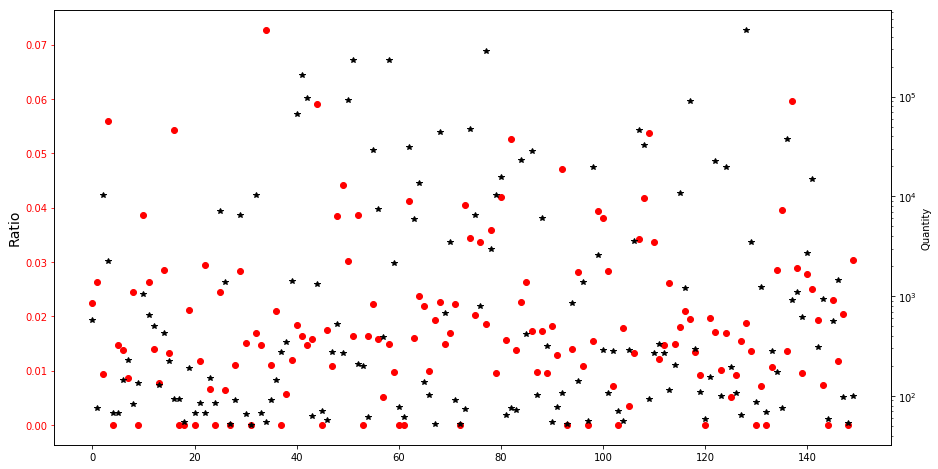

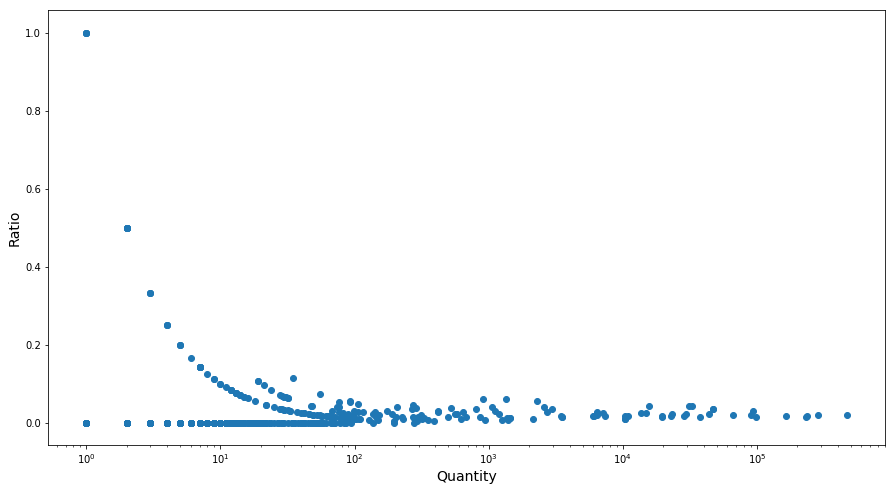

In [55]:
quantity_num = 50
a = np.fromiter(A.values(), dtype=float)
an = np.fromiter(AN.values(), dtype=float)
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.plot(a[an>quantity_num]/an[an>quantity_num],'ro')
ax.set_ylabel('Ratio', fontsize = 14)
ax.tick_params('y', colors='r')
ax2 = ax.twinx()
ax2.plot(an[an>quantity_num],'k*')
ax2.set_yscale('log')
ax2.set_ylabel('Quantity', color='k')
plt.xlabel('Category', fontsize = 14)
plt.show()
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.scatter(an, a/an)
ax.set_xscale('log')
plt.xlabel('Quantity', fontsize = 14)
plt.ylabel('Ratio', fontsize = 14)
plt.show()

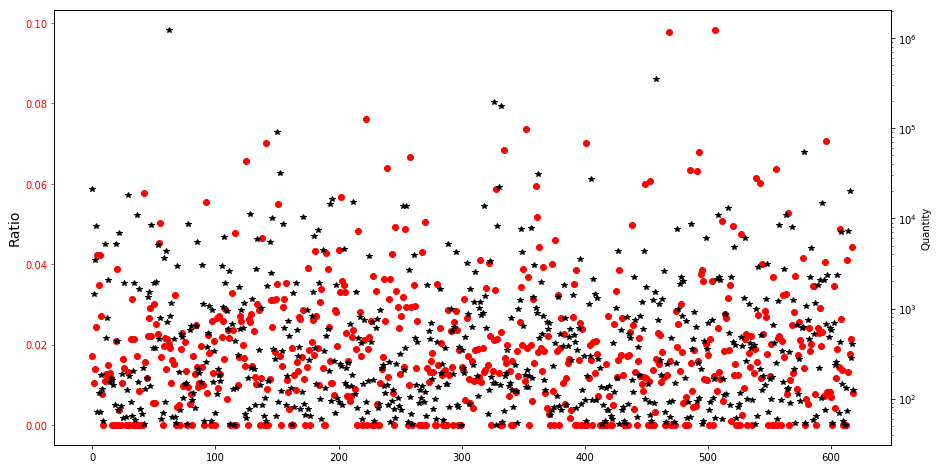

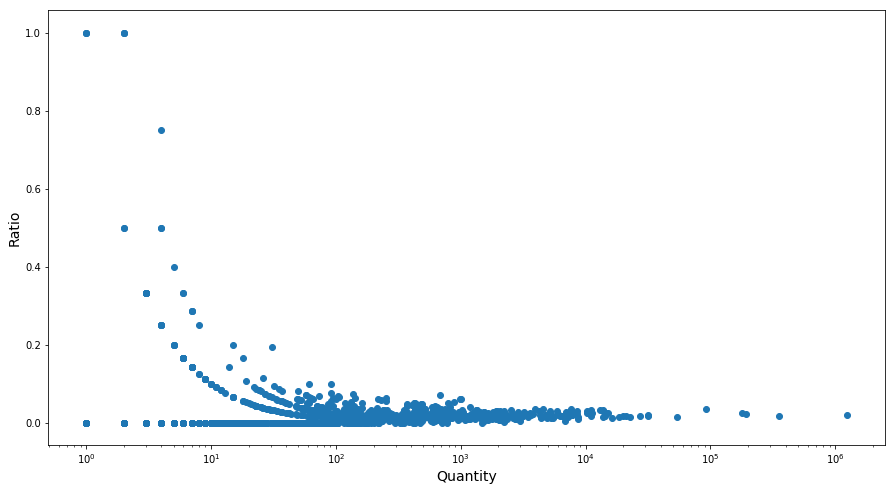

In [56]:
b = np.fromiter(B.values(), dtype=float)
bn = np.fromiter(BN.values(), dtype=float)
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.plot(b[bn>quantity_num]/bn[bn>quantity_num],'ro')
ax.set_ylabel('Ratio', fontsize = 14)
ax.tick_params('y', colors='r')
ax2 = ax.twinx()
ax2.plot(bn[bn>quantity_num],'k*')
ax2.set_yscale('log')
ax2.set_ylabel('Quantity', color='k')
plt.xlabel('Category', fontsize = 14)
plt.show()
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.scatter(bn, b/bn)
ax.set_xscale('log')
plt.xlabel('Quantity', fontsize = 14)
plt.ylabel('Ratio', fontsize = 14)
plt.show()


In [59]:
C = {}
CN = {}
for index, i in enumerate(traindf['item_property_list']):
    for j in i.split(';'):
        C[j] =  C.get(j, 0) + traindf.is_trade[index]
        CN[j] =  CN.get(j, 0) + 1

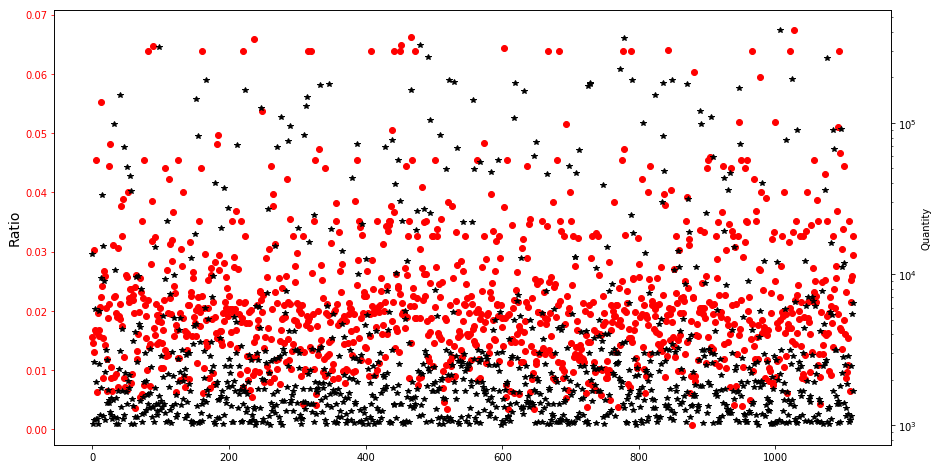

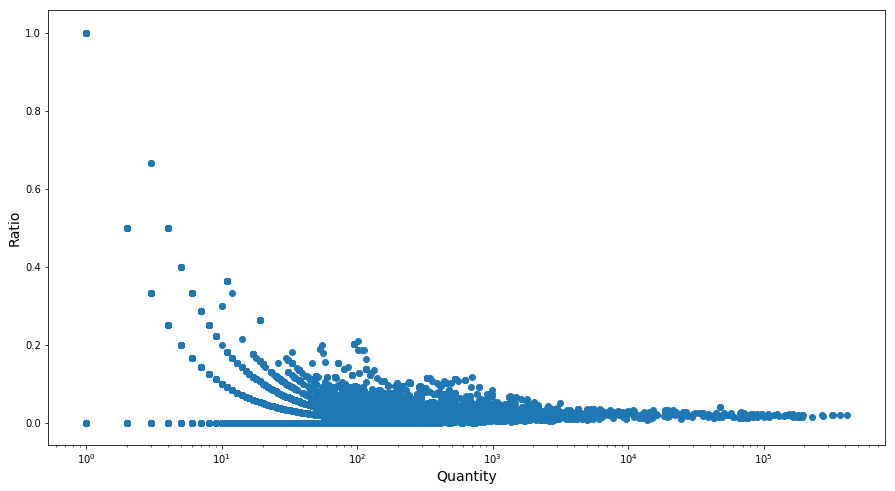

In [64]:
quantity_num = 1000
c = np.fromiter(C.values(), dtype=float)
cn = np.fromiter(CN.values(), dtype=float)
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.plot(c[cn>quantity_num]/cn[cn>quantity_num],'ro')
ax.set_ylabel('Ratio', fontsize = 14)
ax.tick_params('y', colors='r')
ax2 = ax.twinx()
ax2.plot(cn[cn>quantity_num],'k*')
ax2.set_yscale('log')
ax2.set_ylabel('Quantity', color='k')
plt.xlabel('Category', fontsize = 14)
plt.show()
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.scatter(cn, c/cn)
ax.set_xscale('log')
plt.xlabel('Quantity', fontsize = 14)
plt.ylabel('Ratio', fontsize = 14)
plt.show()

In [ ]:
with open('item_property_list.csv','w') as f:
    f.write('item_property_list_element,traded_quantity,total_quantity')
    for key, val in c.items():
        f.write('{},{},{}'.format(key,val,cn[key]))

In [4]:
def variate_time(fea):
    T = []
    for i in range(24):
        a = visualize_feature(fea,traindf[traindf.hour == i], visual=0)
        print(len(a))
        T.append(np.nan_to_num(a))
    T = np.array(T)
    fig = plt.figure(figsize=(10,5))
    for i in range(T.shape[1]):
        plt.plot(T[:,i],label='{}: {} - std/mean {}'.format(fea,i, np.std(T[:,i])/np.mean(T[:,i])))
    plt.legend()
    plt.show()

(24, 3)


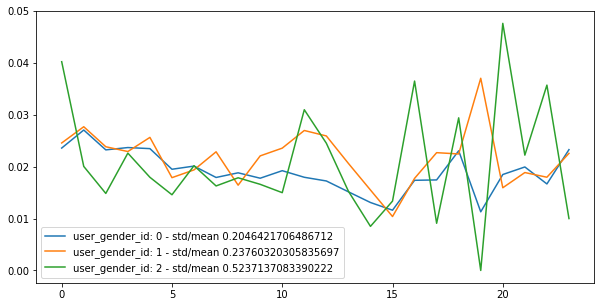

(24, 8)


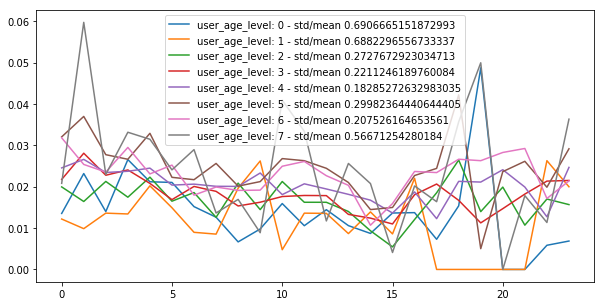

(24, 4)


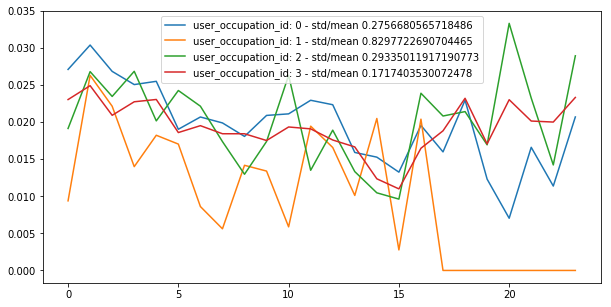

In [22]:
variate_time('user_gender_id')
variate_time('user_age_level')
variate_time('user_occupation_id')

In [31]:
variate_time('item_price_level')

10
11
12


/data/sednn/IJCAI-2018/utility.py:25: RuntimeWarning: invalid value encountered in true_divide
  ratio = n2/n1
/data/sednn/IJCAI-2018/utility.py:34: RuntimeWarning: invalid value encountered in true_divide
  return n2/n1


12
10
11
11
10
10
12
12
11
12
12
11
12
11
10
10
9
9
9
10
10


IndexError: tuple index out of range

In [20]:
print('Sample Size: {}'.format(len(traindf)))
for i in traindf.columns:
    print('{}:\t{}'.format(i, len(np.unique(traindf[i]))))

Sample Size: 478138
instance_id:	478087
item_id:	10075
item_category_list:	14
item_property_list:	10908
item_brand_id:	2055
item_city_id:	128
item_price_level:	14
item_sales_level:	18
item_collected_level:	18
item_pv_level:	22
user_id:	197694
user_gender_id:	4
user_age_level:	9
user_occupation_id:	5
user_star_level:	12
context_id:	478111
context_timestamp:	281824
context_page_id:	20
predict_category_property:	78796
shop_id:	3959
shop_review_num_level:	25
shop_review_positive_rate:	11825
shop_star_level:	22
shop_score_service:	16361
shop_score_delivery:	16423
shop_score_description:	16463
is_trade:	2


In [23]:
print(np.unique(traindf.context_timestamp))
print(np.unique(testdf.context_timestamp))

[1537200001 1537200004 1537200005 ..., 1537804784 1537804786 1537804787]
[1537804802 1537804820 1537804825 ..., 1537891148 1537891153 1537891165]


/data/sednn/IJCAI-2018/utility.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio = n2/n1


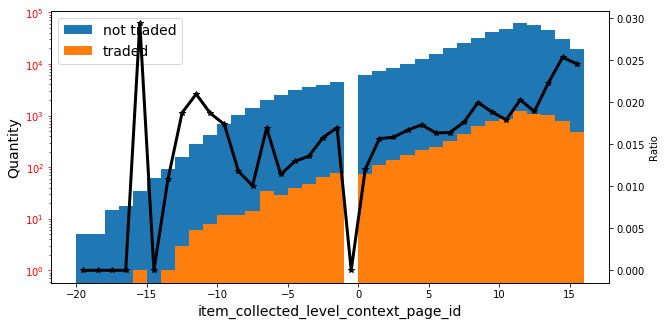

0.4822216120138986


/data/sednn/IJCAI-2018/utility.py:36: RuntimeWarning: invalid value encountered in true_divide
  return n2/n1


array([0.        , 0.        , 0.        , 0.        , 0.02941176,
       0.        , 0.01086957, 0.01875   , 0.02097902, 0.01869159,
       0.01736614, 0.01178782, 0.01007919, 0.01693227, 0.01141732,
       0.01297017, 0.01359003, 0.01580135, 0.01698654,        nan,
       0.01203209, 0.01566653, 0.01584135, 0.01667157, 0.01732451,
       0.01635499, 0.01639673, 0.01762865, 0.0199732 , 0.01884013,
       0.01790906, 0.02029814, 0.01890369, 0.02232556, 0.02534374,
       0.02457982])

In [3]:
f1 = 'item_collected_level'
f2 = 'context_page_id'
traindf['{}_{}'.format(f1,f2)] = traindf[f1] - (1 + traindf[f2] - traindf[f2].min())
visualize_feature('{}_{}'.format(f1,f2),traindf)
#print(traindf['{}_{}'.format(f1,f2)].std()/np.sqrt(np.mean(traindf['{}_{}'.format(f1,f2)] ** 2)))

/data/sednn/IJCAI-2018/utility.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio = n2/n1


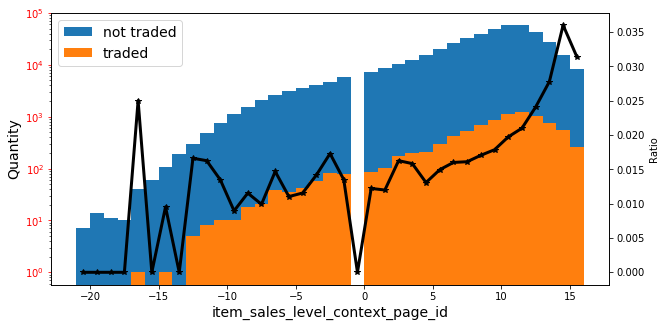

0.5375305062479108


/data/sednn/IJCAI-2018/utility.py:35: RuntimeWarning: invalid value encountered in true_divide
  return n2/n1


In [37]:
f1 = 'item_sales_level'
f2 = 'context_page_id'
traindf['{}_{}'.format(f1,f2)] = traindf[f1] - (1 + traindf[f2] - traindf[f2].min())
visualize_feature('{}_{}'.format(f1,f2),traindf)
print(traindf['{}_{}'.format(f1,f2)].std()/np.sqrt(np.mean(traindf['{}_{}'.format(f1,f2)] ** 2)))

/data/sednn/IJCAI-2018/utility.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio = n2/n1


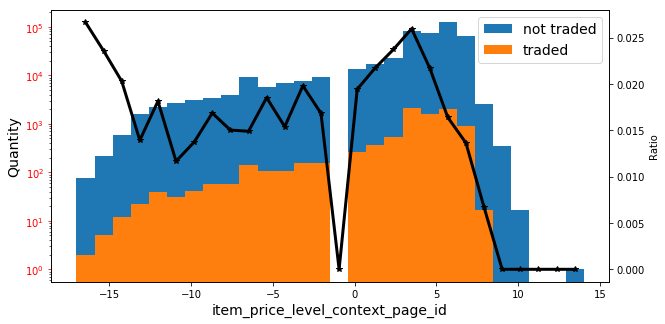

0.7723448533591539


/data/sednn/IJCAI-2018/utility.py:35: RuntimeWarning: invalid value encountered in true_divide
  return n2/n1


In [34]:
f1 = 'item_price_level'
f2 = 'context_page_id'
traindf['{}_{}'.format(f1,f2)] = traindf[f1] - (1 + traindf[f2] - traindf[f2].min())
visualize_feature('{}_{}'.format(f1,f2),traindf)
print(traindf['{}_{}'.format(f1,f2)].std()/np.sqrt(np.mean(traindf['{}_{}'.format(f1,f2)] ** 2)))

In [1]:
f1 = 'user_occupation_id'
f2 = 'user_star_level'
traindf['{}_{}'.format(f1,f2)] = traindf[f1] * 20 + traindf[f2]
visualize_feature('{}_{}'.format(f1,f2),traindf)
print(traindf['{}_{}'.format(f1,f2)].std()/np.sqrt(np.mean(traindf['{}_{}'.format(f1,f2)] ** 2)))

NameError: name 'traindf' is not defined

/data/sednn/IJCAI-2018/utility.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio = n2/n1


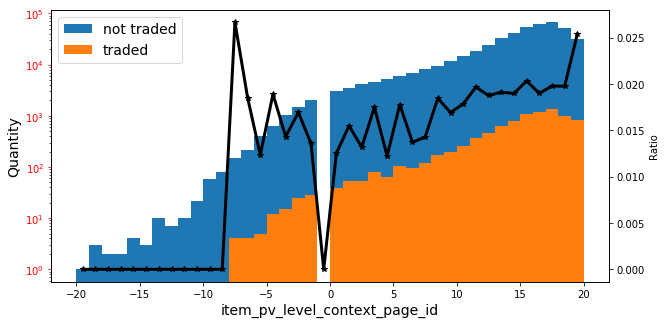

0.3240268105187018


/data/sednn/IJCAI-2018/utility.py:35: RuntimeWarning: invalid value encountered in true_divide
  return n2/n1


In [42]:
f1 = 'item_pv_level'
f2 = 'context_page_id'
traindf['{}_{}'.format(f1,f2)] = traindf[f1] - (1 + traindf[f2] - traindf[f2].min())
visualize_feature('{}_{}'.format(f1,f2),traindf)
print(traindf['{}_{}'.format(f1,f2)].std()/np.sqrt(np.mean(traindf['{}_{}'.format(f1,f2)] ** 2)))

Item


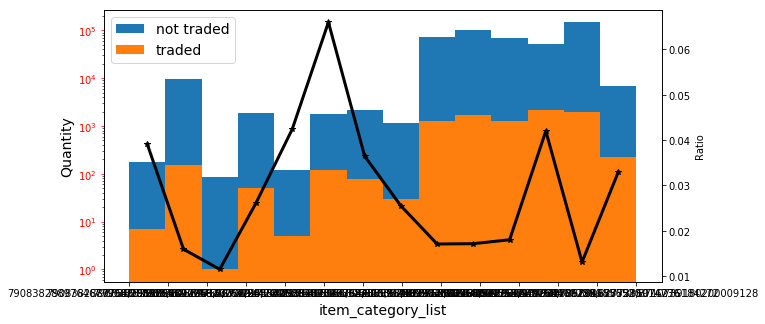

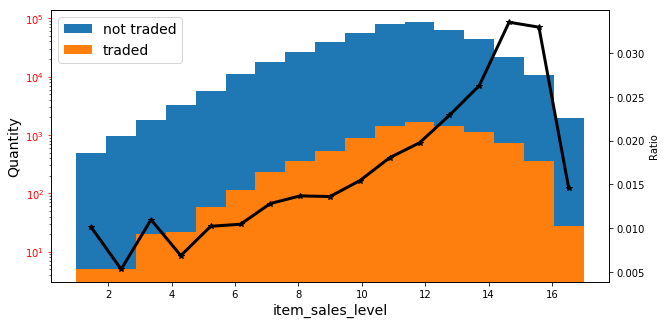

0.226479854093634


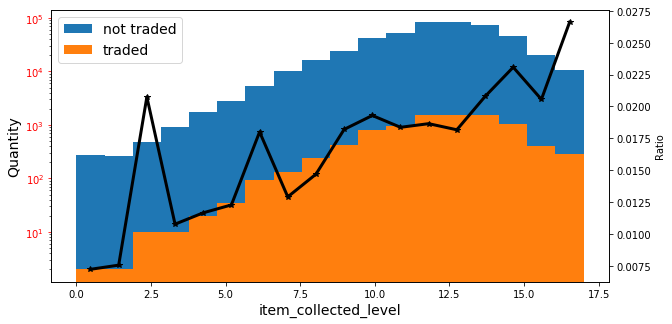

0.20054988245535288


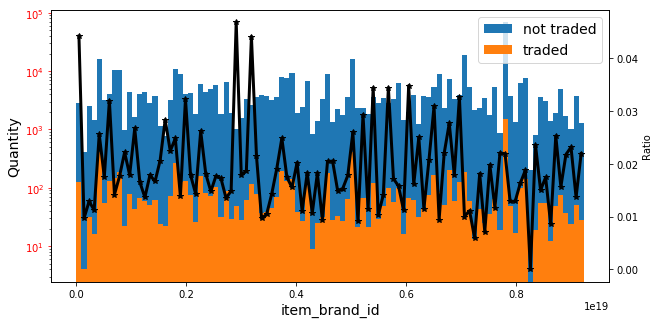

3355890139.2903314


/data/sednn/IJCAI-2018/utility.py:26: RuntimeWarning: invalid value encountered in true_divide
  ratio = n2/n1


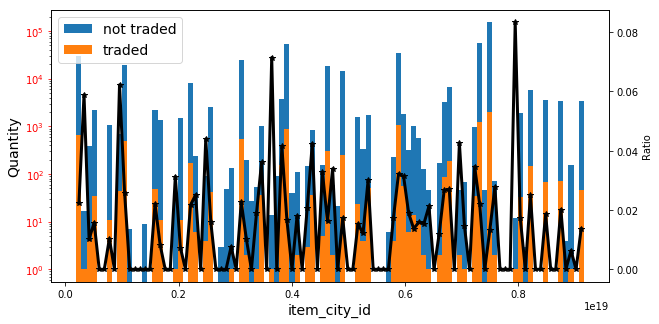

2634253758.161698


/data/sednn/IJCAI-2018/utility.py:39: RuntimeWarning: invalid value encountered in true_divide
  return n2/n1


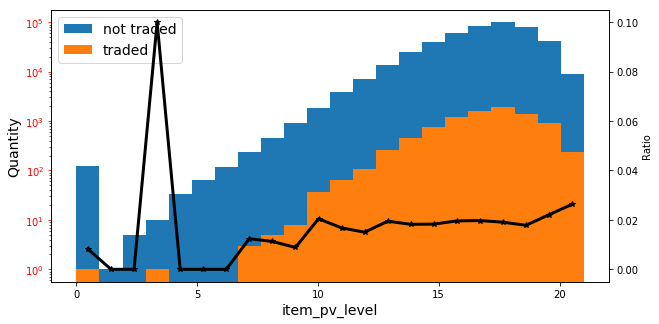

0.1251558981083324


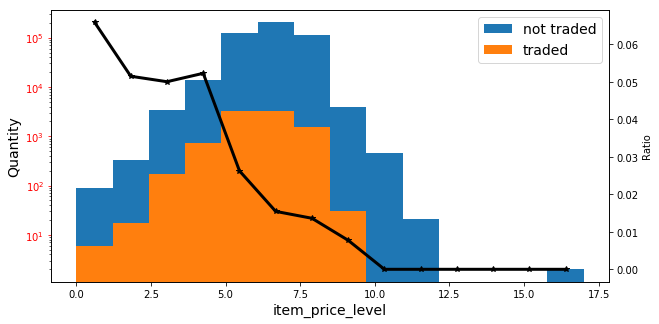

0.1586565013977433
Finish


In [3]:
print('Item')
visualize_feature('item_category_list',traindf)
visualize_feature('item_sales_level',traindf)
visualize_feature('item_collected_level',traindf)
visualize_feature('item_brand_id',traindf)
visualize_feature('item_city_id',traindf)
visualize_feature('item_pv_level',traindf)
visualize_feature('item_price_level',traindf)
print('Finish')

In [ ]:
def visualize_feature2(featurename1,featurename1, df, visual = 1):
    fn = '{}{}'.format(featurename1,featurename2)
    df[fn] = df[featurename1] / df[featurename2]
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    num = len(np.unique(df[fn]))
    if num > 100:
        num=100
    n1, bins, patches = plt.hist(df[(df.is_trade == 0) & (df[fn] < )][featurename],
                                 num,label = 'not traded')
    n2, bins, patches = plt.hist(df[(df.is_trade == 1) & (df[featurename] != -1)][featurename],
                                 bins = bins,label = 'traded')
    plt.legend(fontsize=14)
    plt.xlabel(featurename,fontsize=14)
    plt.ylabel('Quantity',fontsize=14)
    ax.set_yscale('log')
    ax.tick_params('y', colors='r')
    ax2 = ax.twinx()
    ratio = n2/n1
    ratio = np.nan_to_num(ratio)
    ax2.plot((bins[:-1]+bins[1:])/2, ratio, 'k*-',linewidth=3)
    ax2.set_ylabel('Ratio', color='k')
    ax2.tick_params('y', colors='k')
    if visual == 1:
        plt.show()
    else:
        plt.close()
    return n2/n1

User


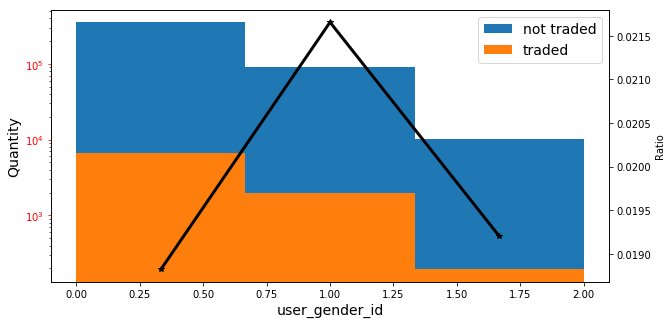

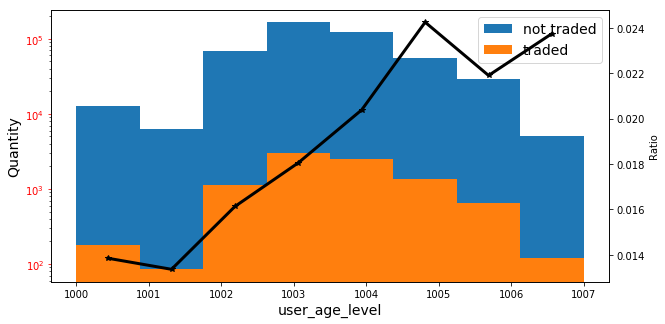

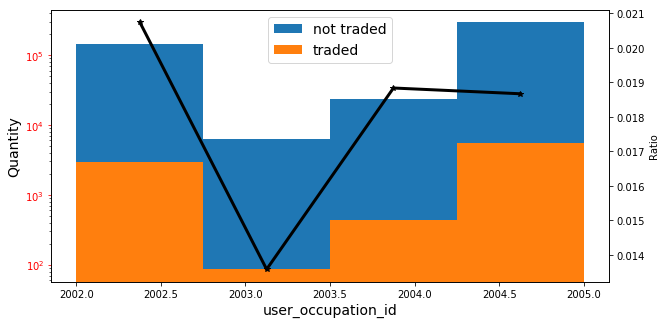

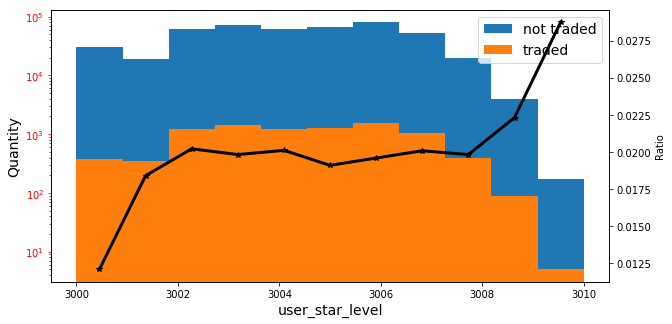

Finish


In [5]:
print('User')
visualize_feature('user_gender_id',traindf)
visualize_feature('user_age_level',traindf)
visualize_feature('user_occupation_id',traindf)
visualize_feature('user_star_level',traindf)
print('Finish')

shop


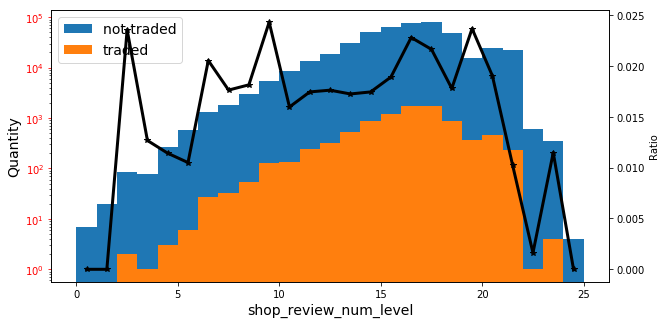

/data/sednn/IJCAI-2018/utility.py:25: RuntimeWarning: invalid value encountered in true_divide
  ratio = n2/n1


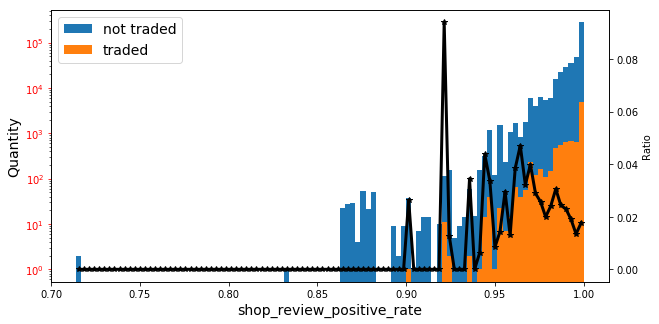

/data/sednn/IJCAI-2018/utility.py:34: RuntimeWarning: invalid value encountered in true_divide
  return n2/n1


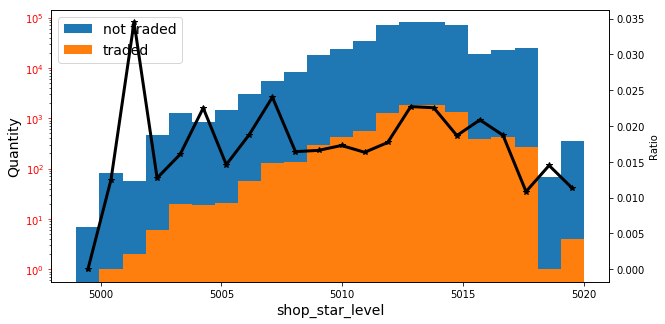

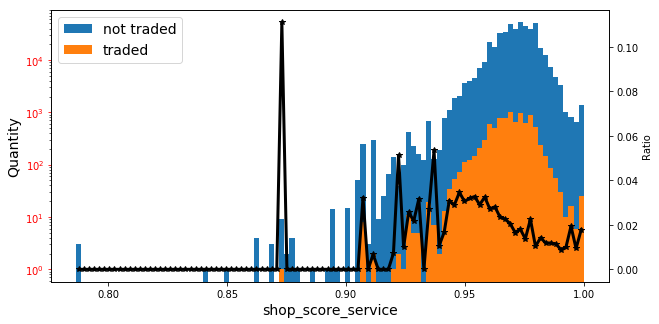

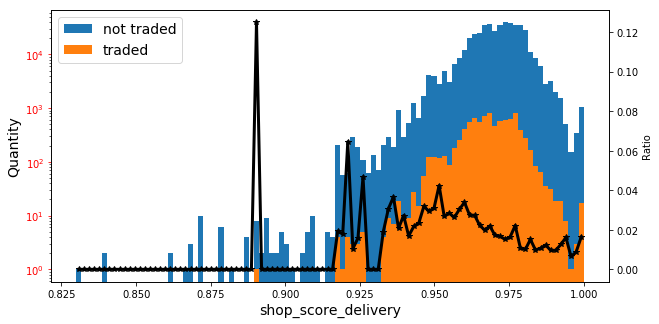

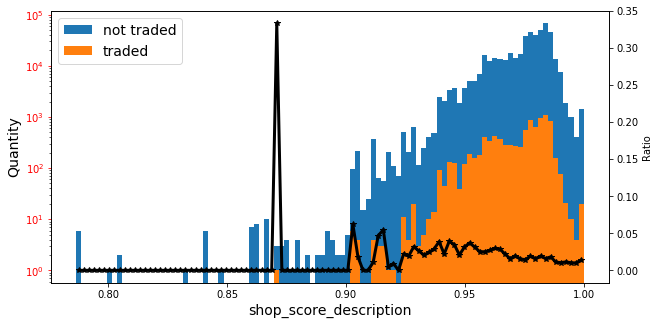

Finish


In [6]:
print('shop')
visualize_feature('shop_review_num_level',traindf)
visualize_feature('shop_review_positive_rate',traindf)
visualize_feature('shop_star_level',traindf)
visualize_feature('shop_score_service',traindf)
visualize_feature('shop_score_delivery',traindf)
visualize_feature('shop_score_description',traindf)
print('Finish')

context


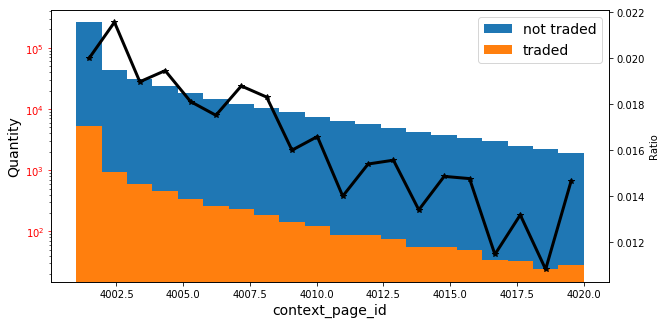

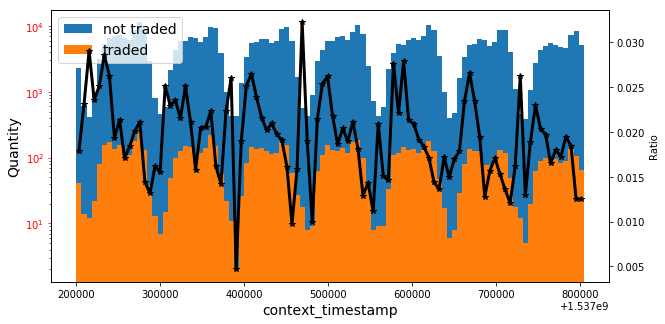

Finish


In [7]:
print('context')
visualize_feature('context_page_id',traindf)
visualize_feature('context_timestamp',traindf)
print('Finish')

In [8]:
traindf['hour'] = [int(datetime.datetime.fromtimestamp(i).strftime('%H')) for i in traindf.context_timestamp]

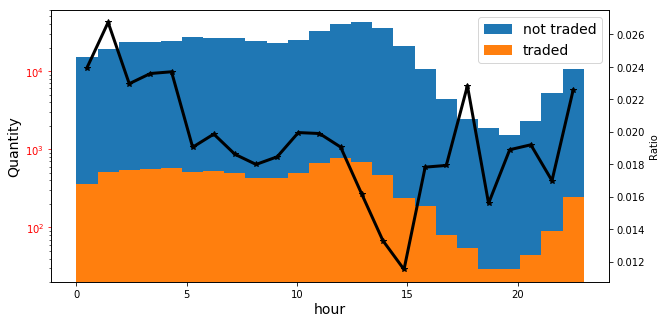

array([ 0.02394338,  0.02674155,  0.02296144,  0.02358992,  0.0236959 ,
        0.01904691,  0.01985762,  0.01861259,  0.0179874 ,  0.0184582 ,
        0.01995012,  0.01989177,  0.01905777,  0.01616123,  0.0132939 ,
        0.01151622,  0.0178201 ,  0.01792603,  0.02283105,  0.0155914 ,
        0.01889251,  0.01919721,  0.01698754,  0.02256058])

In [33]:
visualize_feature('hour',traindf)

In [37]:
train = pd.read_csv('data/train/train.csv')

In [38]:
train.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'hour', 'item_id_mean',
       'item_category_list_mean', 'item_brand_id_mean', 'item_city_id_mean',
       'item_price_level_mean', 'user_id_mean', 'user_gender_id_mean',
       'user_occupation_id_mean', 'shop_id_mean', 'shop_review_num_level_mean',
       'shop_score_service_mean', 'shop_score_delivery_mean',
       'shop_score_description_mean', 'hour_mean', 'user_gender_id_hour_mean',
       'user_occupation_id_ho

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


In [48]:
print(len(traindf.user_id.unique()))
print(len(testdf.user_id.unique()))

197694
13573


In [50]:
len(traindf.user_id.unique()) + len(testdf.user_id.unique()) - len(np.unique(list(traindf.user_id.unique()) + list(testdf.user_id.unique())))

3626

In [51]:
import tensorflow as tf

In [52]:
filenames = ['data/train/round1_ijcai_18_train_20180301.txt']
dataset = tf.data.TextLineDataset(filenames)

In [56]:
dataset.data

AttributeError: 'TextLineDataset' object has no attribute 'data'

In [2]:
df = pd.read_csv('data/train/train.csv')

In [6]:
df.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'hour', 'item_id-mean',
       'item_category_list-mean', 'item_brand_id-mean', 'item_city_id-mean',
       'item_price_level-mean', 'user_id-mean', 'user_gender_id-mean',
       'user_occupation_id-mean', 'shop_id-mean', 'shop_review_num_level-mean',
       'shop_score_service-mean', 'shop_score_delivery-mean',
       'shop_score_description-mean', 'hour-mean', 'user_gender_id-hour-mean',
       'user_occupation_id-ho

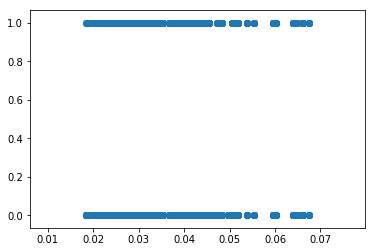

In [9]:
plt.scatter(df.item_property_list_0, df.is_trade)
plt.show()

In [10]:
from scipy.stats import pearsonr

In [ ]:
for i in df.columns[4:]:
    try:
        print(i)
        print(pearsonr(df[i], df.is_trade))
    except:
        pass

item_brand_id
(-0.0053108875603252986, 0.00024031750515914488)
item_city_id
(-0.014621619876234343, 4.937663754198654e-24)
item_price_level
(-0.055895124274107165, 0.0)
item_sales_level
(0.03735830295259632, 3.048106291960091e-147)
item_collected_level
(0.013971589843333266, 4.395773254661369e-22)
item_pv_level
(0.0060770748056827775, 2.6436317306183406e-05)
user_id
(0.0002554017546775919, 0.8598198217281163)
user_gender_id
(0.008843379797217261, 9.650751137207197e-10)
user_age_level
(0.002627560409044106, 0.0692337535076527)
user_occupation_id
(0.002025596011582917, 0.16131958332060187)
user_star_level


In [2]:
from utility import *
import pandas as pd

In [3]:
df1 = pd.read_csv('data/train/train.csv')
df1.context_timestamp += 8*60*60
df1 = convert_time(df1)

In [ ]:
df = pd.read_csv('data/train/round1_ijcai_18_train_20180301.txt',sep=' ')
df.context_timestamp += 8*60*60
df = convert_time(df)
item_category_list_unique = list(np.unique(df.item_category_list))
df.item_category_list.replace(item_category_list_unique, list(np.arange(len(item_category_list_unique))), inplace=True)